<a href="https://colab.research.google.com/github/CoraxKolkrabe/Metricas-datos-y-calibracion-inteligente/blob/main/Metricas%2C_datos_y_calibracion_inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# 1. Subir el archivo
uploaded = files.upload()

# 2. Nombre del archivo
nombre_archivo = "Datos Estaciones AMB.xlsx"

# 3. Leer Excel
df = pd.read_excel(nombre_archivo, sheet_name=0)

# 4. Reemplazar "NoData" por NaN
df = df.replace("NoData", pd.NA)

# 5. Renombrar columnas (ajústalas según tu Excel)
df.columns = [
    "timestamp", "PM10", "pm25_ref", "NO2", "O3",
    "Temp_Aire", "Lluvia", "Humedad", "WD", "WS", "R_Solar"
]

# 6. Convertir columna timestamp a datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce", dayfirst=True)

# 7. Guardar CSV limpio
df.to_csv("datos_limpios.csv", index=False)

# 8. Descargar
files.download("datos_limpios.csv")

Saving Datos Estaciones AMB.xlsx to Datos Estaciones AMB (1).xlsx


/tmp/ipython-input-3853642666.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce", dayfirst=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import glob

# 1. Buscar todos los archivos que terminan en "_pm25a.csv"
archivos = glob.glob("*_pm25a.csv")
print("Archivos encontrados:", archivos)

# 2. Lista para ir guardando los DataFrames
dfs = []

for f in archivos:
    try:
        df_temp = pd.read_csv(f)

        # Si el archivo no tiene filas, lo saltamos
        if df_temp.empty:
            print(f"⚠️ Archivo vacío ignorado: {f}")
            continue

        # Asegurar columnas correctas
        if "fecha_hora_med" not in df_temp.columns or "valor" not in df_temp.columns:
            print(f"⚠️ Archivo con columnas incorrectas ignorado: {f}")
            continue

        # Convertir tipos
        df_temp["fecha_hora_med"] = pd.to_datetime(df_temp["fecha_hora_med"], utc=True, errors="coerce")
        df_temp["valor"] = pd.to_numeric(df_temp["valor"], errors="coerce")

        dfs.append(df_temp)

    except Exception as e:
        print(f"⚠️ Error procesando {f}: {e}")

# 3. Concatenar todo
if dfs:
    df_all = pd.concat(dfs, ignore_index=True)
    df_all = df_all.sort_values("fecha_hora_med").reset_index(drop=True)

    print("\n✅ Datos consolidados con éxito")
    print(df_all.head())
    print("\nTotal de registros:", len(df_all))

    # 4. Guardar en CSV final
    nombre_salida = "pm25_all.csv"
    df_all.to_csv(nombre_salida, index=False)

    from google.colab import files
    files.download(nombre_salida)
else:
    print("❌ No se encontraron datos válidos en los archivos.")
import pandas as pd
from google.colab import files

# 1. Subir varios archivos a la vez (selecciona los 10 desde tu PC)
uploaded = files.upload()

# 2. Procesar cada archivo
for nombre_archivo in uploaded.keys():
    print(f"\nProcesando: {nombre_archivo}")

    # Leer CSV
    df = pd.read_csv(nombre_archivo)

    # Normalizar nombres de columnas (sin comillas, espacios, minúsculas)
    df.columns = df.columns.str.strip().str.strip('"').str.lower()

    # Renombrar para estandarizar
    df = df.rename(columns={
        "fecha_hora_med": "fecha_hora_med",
        "fecha_hora": "fecha_hora_med",   # algunos archivos usan "fecha_hora"
        "id_parametro": "id_parametro",
        "valor": "valor"
    })

    # Verificar que las columnas necesarias existan
    columnas_necesarias = {"fecha_hora_med", "id_parametro", "valor"}
    if not columnas_necesarias.issubset(set(df.columns)):
        print(f"⚠️ El archivo {nombre_archivo} no tiene las columnas esperadas. Se omitirá.")
        continue

    # Convertir fecha/hora a datetime
    df["fecha_hora_med"] = pd.to_datetime(df["fecha_hora_med"], errors="coerce", utc=True)

    # Filtrar solo pm25_a
    df_pm25 = df[df["id_parametro"].str.lower() == "pm25_a"].copy()

    # Convertir valores a numéricos
    df_pm25["valor"] = pd.to_numeric(df_pm25["valor"], errors="coerce")

    # Resetear índice
    df_pm25 = df_pm25.reset_index(drop=True)

    # Nombre del archivo de salida
    nombre_salida = nombre_archivo.replace(".csv", "_pm25a.csv")
    df_pm25.to_csv(nombre_salida, index=False)

    print(f"   Guardado: {nombre_salida}")

# 3. Descargar todos los archivos limpios
for nombre_archivo in uploaded.keys():
    nombre_salida = nombre_archivo.replace(".csv", "_pm25a.csv")
    try:
        files.download(nombre_salida)
    except:
        print(f"⚠️ No se generó salida para: {nombre_archivo}")


Saving mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-04-01T00_00_00_2019-04-30T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-04-01T00_00_00_2019-04-30T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-03-01T00_00_00_2019-03-31T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-03-01T00_00_00_2019-03-31T23_59_59 (1).csv
Savi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⚠️ No se generó salida para: mediciones_clg_normalsup_pm25_a_2019-03-01T00_00_00_2019-03-31T23_59_59 (1).csv
⚠️ No se generó salida para: mediciones_clg_normalsup_pm25_a_2019-02-01T00_00_00_2019-02-28T23_59_59 (1).csv
⚠️ No se generó salida para: mediciones_clg_normalsup_pm25_a_2019-01-01T00_00_00_2019-01-31T23_59_59 (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import glob

# 1. Buscar todos los archivos que terminan en "_pm25a.csv"
archivos = glob.glob("*_pm25a.csv")
print("Archivos encontrados:", archivos)

# 2. Lista para ir guardando los DataFrames
dfs = []

for f in archivos:
    try:
        df_temp = pd.read_csv(f)

        # Si el archivo no tiene filas, lo saltamos
        if df_temp.empty:
            print(f"⚠️ Archivo vacío ignorado: {f}")
            continue

        # Asegurar columnas correctas
        if "fecha_hora_med" not in df_temp.columns or "valor" not in df_temp.columns:
            print(f"⚠️ Archivo con columnas incorrectas ignorado: {f}")
            continue

        # Convertir tipos
        df_temp["fecha_hora_med"] = pd.to_datetime(df_temp["fecha_hora_med"], utc=True, errors="coerce")
        df_temp["valor"] = pd.to_numeric(df_temp["valor"], errors="coerce")

        dfs.append(df_temp)

    except Exception as e:
        print(f"⚠️ Error procesando {f}: {e}")

# 3. Concatenar todo
if dfs:
    df_all = pd.concat(dfs, ignore_index=True)
    df_all = df_all.sort_values("fecha_hora_med").reset_index(drop=True)

    print("\n✅ Datos consolidados con éxito")
    print(df_all.head())
    print("\nTotal de registros:", len(df_all))

    # 4. Guardar en CSV final
    nombre_salida = "pm25_all.csv"
    df_all.to_csv(nombre_salida, index=False)

    from google.colab import files
    files.download(nombre_salida)
else:
    print("❌ No se encontraron datos válidos en los archivos.")


Archivos encontrados: ['mediciones_clg_normalsup_pm25_a_2018-12-01T00_00_00_2018-12-31T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2018-11-01T00_00_00_2018-11-30T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-04-01T00_00_00_2019-04-30T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59_pm25a.csv', 'mediciones_cl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Rango de fechas: 2018-11-03 23:32:49.639000+00:00 → 2019-09-01 04:03:01.820000+00:00
Número total de registros: 8356
Valores nulos por columna:
 fecha_hora_med    8
id_parametro      0
valor             0
dtype: int64


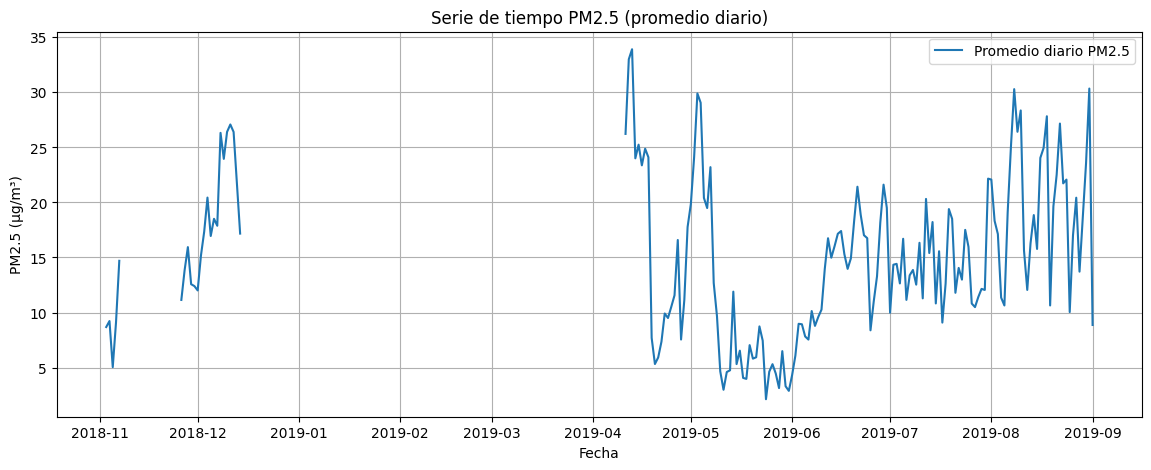


Estadísticas de PM2.5:
count    8356.000000
mean       14.325161
std         9.127371
min         0.000000
25%         7.416667
50%        12.500001
75%        19.500000
max        64.142853
Name: valor, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el dataset consolidado
df = pd.read_csv("pm25_all.csv", parse_dates=["fecha_hora_med"])

# 2. Revisar info básica
print("Rango de fechas:", df["fecha_hora_med"].min(), "→", df["fecha_hora_med"].max())
print("Número total de registros:", len(df))
print("Valores nulos por columna:\n", df.isnull().sum())

# 3. Re-samplear por día (promedio)
df_daily = df.set_index("fecha_hora_med").resample("D")["valor"].mean()

# 4. Graficar serie de tiempo diaria
plt.figure(figsize=(14,5))
plt.plot(df_daily.index, df_daily.values, label="Promedio diario PM2.5")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Serie de tiempo PM2.5 (promedio diario)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Estadísticas descriptivas
print("\nEstadísticas de PM2.5:")
print(df["valor"].describe())


📊 Estadísticas básicas:
count    3884.000000
mean       14.934679
std         9.032387
min         0.416667
25%         7.833334
50%        13.416667
75%        20.839286
max        39.083336
Name: valor, dtype: float64


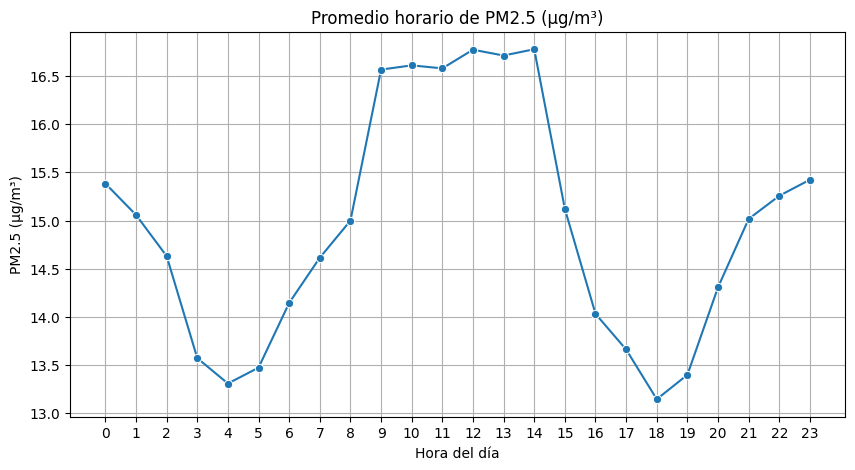

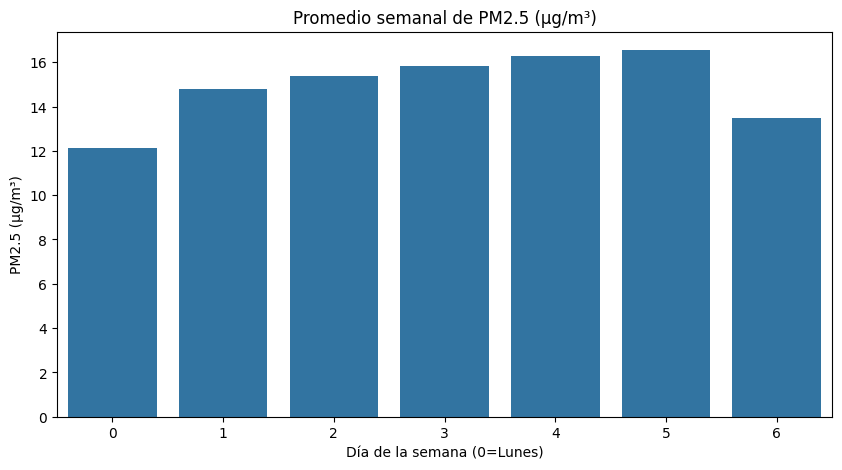

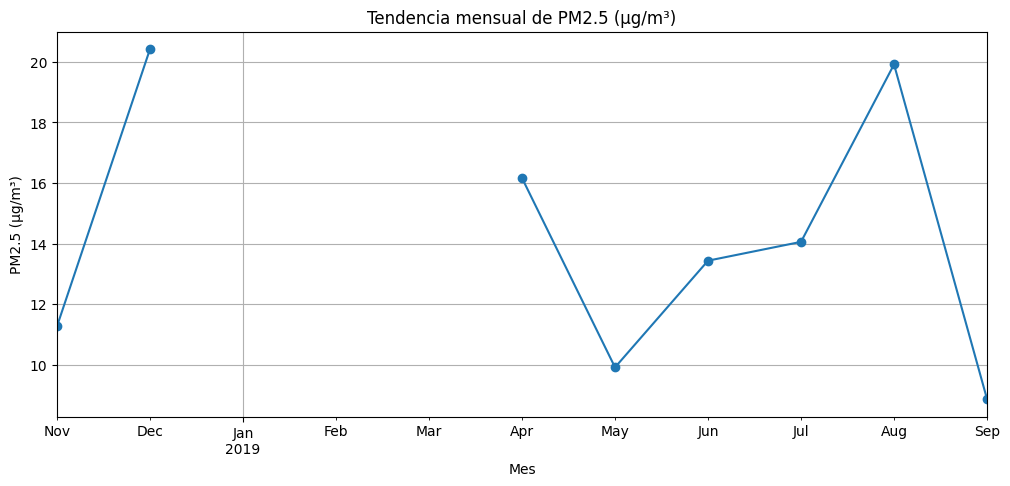

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Estadísticas descriptivas ===
print("📊 Estadísticas básicas:")
print(df_limpio.describe())

# === 2. Promedio por hora del día ===
df_hourly = df_limpio.groupby(df_limpio.index.hour).mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=df_hourly.index, y=df_hourly.values, marker="o")
plt.title("Promedio horario de PM2.5 (µg/m³)")
plt.xlabel("Hora del día")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

# === 3. Promedio por día de la semana ===
# (0 = Lunes, 6 = Domingo)
df_weekly = df_limpio.groupby(df_limpio.index.dayofweek).mean()

plt.figure(figsize=(10,5))
sns.barplot(x=df_weekly.index, y=df_weekly.values)
plt.title("Promedio semanal de PM2.5 (µg/m³)")
plt.xlabel("Día de la semana (0=Lunes)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# === 4. Promedio mensual ===
df_monthly = df_limpio.groupby(df_limpio.index.to_period("M")).mean()

plt.figure(figsize=(12,5))
df_monthly.plot(kind="line", marker="o", legend=False)
plt.title("Tendencia mensual de PM2.5 (µg/m³)")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Mes")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

df_test = pd.read_csv("pm25_all.csv")
print(df_test.columns)


Index(['fecha_hora_med', 'id_parametro', 'valor'], dtype='object')


/tmp/ipython-input-2934450466.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_pm25["valor"].resample("H").mean()


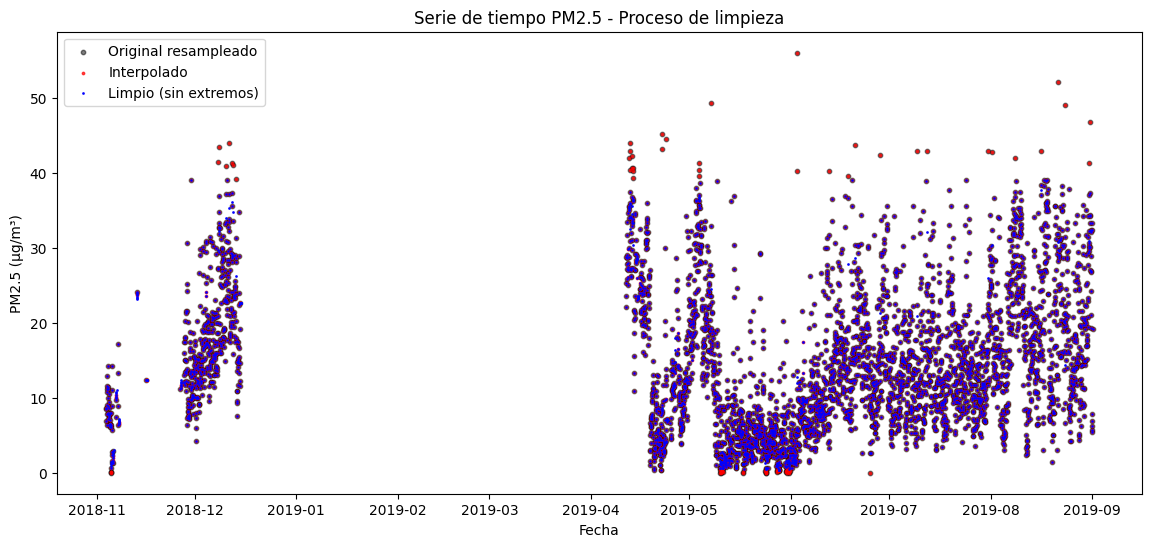

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Cargar datos ===
df = pd.read_csv("pm25_all.csv", parse_dates=["fecha_hora_med"])
df = df.set_index("fecha_hora_med").sort_index()

# === 2. Filtrar PM2.5 si fuera necesario ===
df_pm25 = df[df["id_parametro"] == "pm25_a"].copy()

# === 3. Resamplear a frecuencia horaria ===
df_resampled = df_pm25["valor"].resample("H").mean()

# === 4. Interpolar huecos cortos (máx 3 horas seguidas) ===
df_interpolado = df_resampled.interpolate(limit=3)

# === 5. Tratar valores extremos (outliers) ===
q_low = df_interpolado.quantile(0.01)   # percentil 1%
q_high = df_interpolado.quantile(0.99)  # percentil 99%

# Reemplazar extremos por NaN
df_limpio = df_interpolado.where(
    (df_interpolado >= q_low) & (df_interpolado <= q_high)
)

# Interpolar otra vez para cubrir NaN de extremos
df_limpio = df_limpio.interpolate(limit=3)

# === 6. Visualización con puntos ===
plt.figure(figsize=(14,6))

# Puntos grises = datos originales resampleados
plt.scatter(df_resampled.index, df_resampled,
            label="Original resampleado", alpha=0.5, color="black", s=10)

# Puntos naranjas = datos interpolados
plt.scatter(df_interpolado.index, df_interpolado,
            label="Interpolado", alpha=0.7, color="red", s=3)

# Puntos azules = datos limpios (sin extremos)
plt.scatter(df_limpio.index, df_limpio,
            label="Limpio (sin extremos)", alpha=0.9, color="blue", s=1)

plt.title("Serie de tiempo PM2.5 - Proceso de limpieza")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


/tmp/ipython-input-852328663.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df["valor"].resample("H").mean()


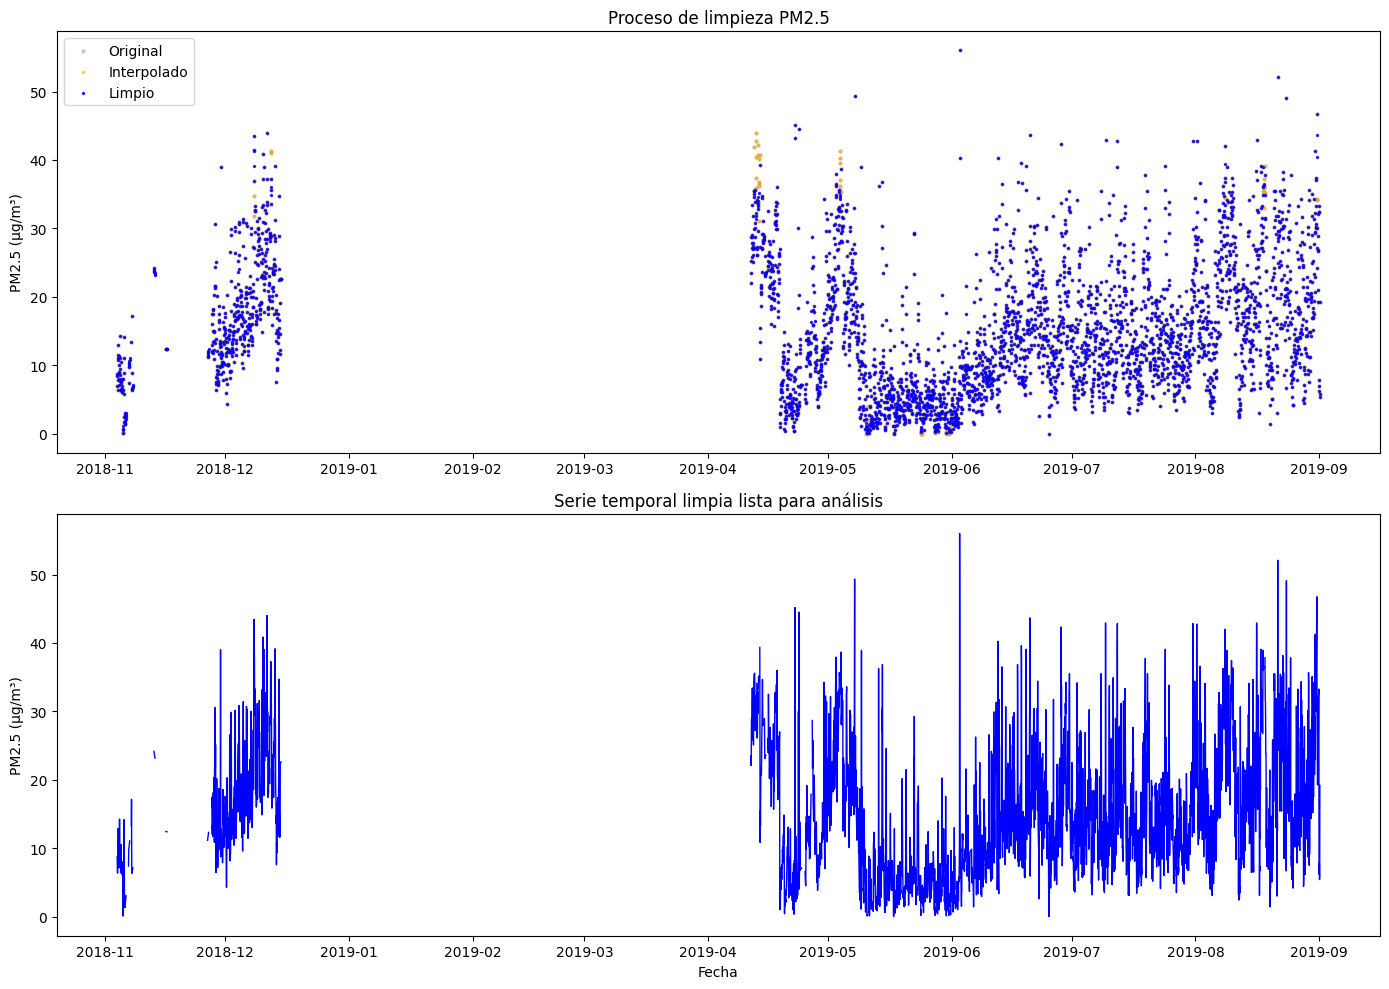

Datos originales: 7230 puntos
Datos después de limpieza: 7230 puntos
Porcentaje de datos válidos: 53.4%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Cargar datos ===
df = pd.read_csv("pm25_all.csv", parse_dates=["fecha_hora_med"])
df = df.set_index("fecha_hora_med").sort_index()

# === 2. Resamplear a frecuencia horaria (TODO primero) ===
df_resampled = df["valor"].resample("H").mean()

# === 3. Interpolar huecos cortos ===
df_interpolado = df_resampled.interpolate(limit=3)

# === 4. Suavizar para mejor detección de outliers ===
df_suavizado = df_interpolado.rolling(window=6, center=True, min_periods=1).mean()

# === 5. Tratar valores extremos ===
q_low = df_suavizado.quantile(0.01)
q_high = df_suavizado.quantile(0.99)

# Crear máscara basada en datos suavizados, aplicar a datos interpolados
mascara = (df_suavizado >= q_low) & (df_suavizado <= q_high)
df_limpio = df_interpolado.where(mascara)

# Interpolar NaN resultantes de quitar outliers
df_limpio = df_limpio.interpolate(limit=3)

# === 6. Guardar resultados ===
df_final = pd.DataFrame({
    'original': df_resampled,
    'interpolado': df_interpolado,
    'limpio': df_limpio
})
df_final.to_csv('pm25_procesado.csv')

# === 7. Visualización mejorada ===
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Proceso completo
ax1.scatter(df_resampled.index, df_resampled, alpha=0.3, color="gray", s=5, label="Original")
ax1.scatter(df_interpolado.index, df_interpolado, alpha=0.5, color="orange", s=3, label="Interpolado")
ax1.scatter(df_limpio.index, df_limpio, alpha=0.8, color="blue", s=2, label="Limpio")
ax1.set_ylabel("PM2.5 (µg/m³)")
ax1.legend()
ax1.set_title("Proceso de limpieza PM2.5")

# Resultado final
ax2.plot(df_limpio.index, df_limpio, color="blue", linewidth=1)
ax2.set_ylabel("PM2.5 (µg/m³)")
ax2.set_xlabel("Fecha")
ax2.set_title("Serie temporal limpia lista para análisis")

plt.tight_layout()
plt.savefig('limpieza_pm25.png', dpi=300)
plt.show()

print(f"Datos originales: {len(df_resampled)} puntos")
print(f"Datos después de limpieza: {len(df_limpio)} puntos")
print(f"Porcentaje de datos válidos: {100*(df_limpio.notna().sum()/len(df_limpio)):.1f}%")

In [ ]:
# === 1. Cargar datos ===
df = pd.read_csv("pm25_all.csv", parse_dates=["fecha_hora_med"])

# --- Arreglar problemas de fechas ---
df["fecha_hora_med"] = df["fecha_hora_med"].dt.floor("h")  # mejor usar 'h'

# Eliminar filas con fechas nulas
df = df.dropna(subset=["fecha_hora_med"])

# Ordenar explícitamente por fecha
df = df.sort_values("fecha_hora_med")

# Quitar duplicados
df = df.drop_duplicates(subset="fecha_hora_med")

# Crear índice monotónico
df = df.set_index("fecha_hora_med")

print("Rango de fechas en los datos crudos:")
print(df.index.min(), " -> ", df.index.max())

# === 2. Verificar ahora en Febrero 2019 ===
df_febrero = df.loc["2019-02-01":"2019-02-10"]
print("\nDatos crudos en Febrero 2019:")
print(df_febrero.head(20))

# === 3. Filtrar solo PM2.5 ===
df_pm25 = df[df["id_parametro"] == "pm25_a"].copy()
df_pm25_febrero = df_pm25.loc["2019-02-01":"2019-02-10"]

print("\nPM2.5 en Febrero 2019 (datos crudos):")
print(df_pm25_febrero.head(20))


Rango de fechas en los datos crudos:
2018-11-03 23:00:00+00:00  ->  2019-09-01 04:00:00+00:00

Datos crudos en Febrero 2019:
Empty DataFrame
Columns: [id_parametro, valor]
Index: []

PM2.5 en Febrero 2019 (datos crudos):
Empty DataFrame
Columns: [id_parametro, valor]
Index: []


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

# === 1. Asegurar que la serie está limpia y resampleada a 1H ===
# (si ya tienes df_limpio con índice datetime, seguimos)

# === 2. Reorganizar en formato "día x hora" ===
df_daily = df_limpio.to_frame(name="pm25").copy()
df_daily["fecha"] = df_daily.index.date
df_daily["hora"] = df_daily.index.hour

# Crear matriz: filas = días, columnas = horas
matriz_dias = df_daily.pivot(index="fecha", columns="hora", values="pm25")

# === 3. Calcular distancias euclídeas ===
# Usamos pdist para pares de días, luego convertimos a matriz cuadrada
distancias = pdist(matriz_dias.fillna(0), metric="euclidean")
matriz_distancias = squareform(distancias)

# Convertimos a DataFrame para mejor lectura
df_distancias = pd.DataFrame(
    matriz_distancias,
    index=matriz_dias.index,
    columns=matriz_dias.index
)

# === 4. Mostrar ejemplo ===
print("Matriz de distancias (primeros 5 días):")
print(df_distancias.iloc[:5, :5])


Matriz de distancias (primeros 5 días):
fecha       2018-11-03  2018-11-04  2018-11-05  2018-11-06  2018-11-07
fecha                                                                 
2018-11-03    0.000000   45.120246   31.243300   16.827908   37.443400
2018-11-04   45.120246    0.000000   28.658695   40.972541   33.279019
2018-11-05   31.243300   28.658695    0.000000   30.988653   29.794223
2018-11-06   16.827908   40.972541   30.988653    0.000000   33.996275
2018-11-07   37.443400   33.279019   29.794223   33.996275    0.000000


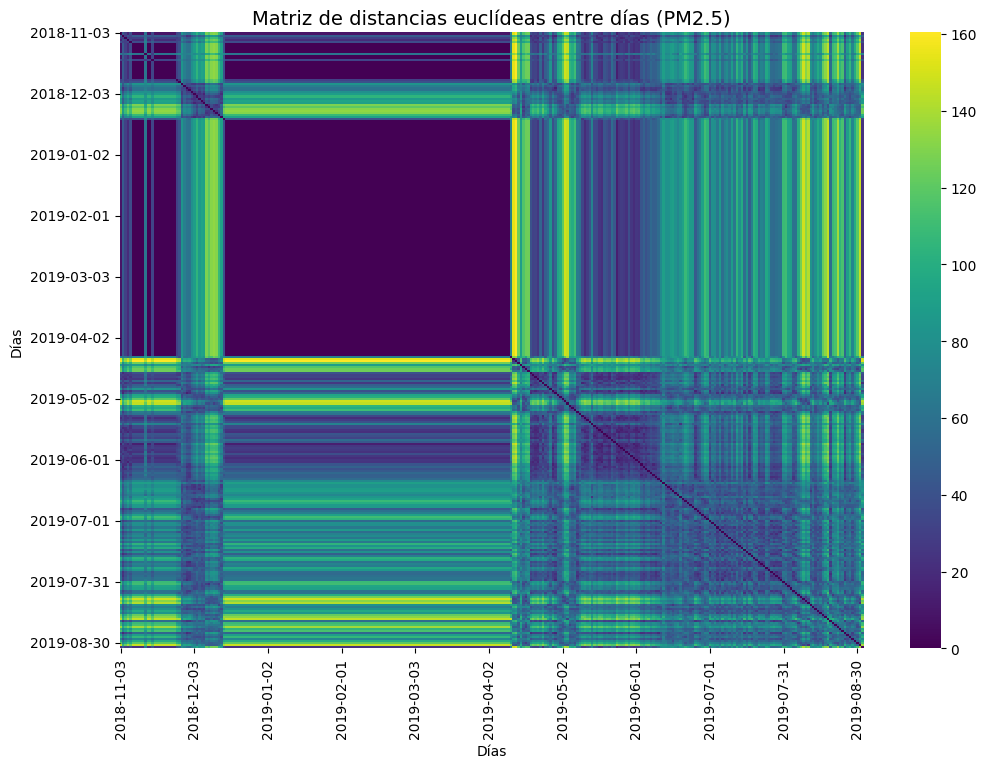

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Reorganizar en formato "día x hora" ===
df_daily = df_limpio.to_frame(name="pm25").copy()
df_daily["fecha"] = df_daily.index.date
df_daily["hora"] = df_daily.index.hour

# Crear matriz: filas = días, columnas = horas
matriz_dias = df_daily.pivot(index="fecha", columns="hora", values="pm25")

# === 2. Calcular distancias euclídeas entre días ===
distancias = pdist(matriz_dias.fillna(0), metric="euclidean")
matriz_distancias = squareform(distancias)

# Convertimos a DataFrame
df_distancias = pd.DataFrame(
    matriz_distancias,
    index=matriz_dias.index,
    columns=matriz_dias.index
)

# === 3. Graficar heatmap ===
plt.figure(figsize=(12,8))
sns.heatmap(df_distancias, cmap="viridis", xticklabels=30, yticklabels=30)
plt.title("Matriz de distancias euclídeas entre días (PM2.5)", fontsize=14)
plt.xlabel("Días")
plt.ylabel("Días")
plt.show()


In [ ]:
import os
import glob

# Ver todos los archivos CSV en el directorio actual
print("=== ARCHIVOS DISPONIBLES ===")
archivos_csv = glob.glob("*.csv")
for archivo in archivos_csv:
    print(f"- {archivo}")

# Ver también archivos en subdirectorios
print("\n=== BUSCANDO EN SUBDIRECTORIOS ===")
for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".csv"):
            print(f"- {os.path.join(root, file)}")

=== ARCHIVOS DISPONIBLES ===
- mediciones_clg_normalsup_pm25_a_2019-01-01T00_00_00_2019-01-31T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_a_2018-12-01T00_00_00_2018-12-31T23_59_59 (1)_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59 (1)_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59 (1)_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59.csv
- pm25_all.csv
- mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2018-11-01T00_00_00_2018-11-30T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_a_2018-12-01T00_00_00_2018-12-31T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_a_2018-11-01T00_00_00_2018-11-30T23_59_59 (1)_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_

In [ ]:
import pandas as pd
import numpy as np

# Primero veamos qué hay exactamente en el archivo de referencia
print("=== DIAGNÓSTICO DEL ARCHIVO 'Datos Estaciones AMB.csv' ===")

# Leer como texto plano para ver la estructura real
try:
    with open('Datos Estaciones AMB.csv', 'r', encoding='utf-8') as f:
        lineas = f.readlines()

    print(f"Total de líneas en el archivo: {len(lineas)}")
    print("\n--- Primeras 10 líneas del archivo ---")
    for i in range(min(10, len(lineas))):
        print(f"Línea {i+1}: {repr(lineas[i][:100])}")  # Mostrar primeros 100 caracteres

    print(f"\n--- Línea problemática 67 ---")
    if len(lineas) >= 67:
        print(f"Línea 67: {repr(lineas[66])}")
    else:
        print("El archivo tiene menos de 67 líneas")

except UnicodeDecodeError:
    # Intentar con encoding latino
    with open('Datos Estaciones AMB.csv', 'r', encoding='latin-1') as f:
        lineas = f.readlines()

    print(f"Total de líneas en el archivo: {len(lineas)}")
    print("\n--- Primeras 10 líneas del archivo ---")
    for i in range(min(10, len(lineas))):
        print(f"Línea {i+1}: {repr(lineas[i][:100])}")

=== DIAGNÓSTICO DEL ARCHIVO 'Datos Estaciones AMB.csv' ===
Total de líneas en el archivo: 8041

--- Primeras 10 líneas del archivo ---
Línea 1: '\ufefftimestamp;PM10;pm25_ref;NO2 ;O3 ;Temp_Aire;Lluvia;Humedad;WD;WS;R_Solar\n'
Línea 2: '1/10/2018 0:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
Línea 3: '1/10/2018 1:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
Línea 4: '1/10/2018 2:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
Línea 5: '1/10/2018 3:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
Línea 6: '1/10/2018 4:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
Línea 7: '1/10/2018 5:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
Línea 8: '1/10/2018 6:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
Línea 9: '1/10/2018 7:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;

In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo de referencia con los parámetros correctos
df_ref = pd.read_csv(
    'Datos Estaciones AMB.csv',
    sep=';',                          # Separador es punto y coma
    parse_dates=['timestamp'],        # Columna de fecha se llama timestamp
    index_col='timestamp',            # Usar timestamp como índice
    na_values=['NoData', '---', ''],  # Tratar estos valores como NaN
    encoding='utf-8-sig'              # Encoding para el BOM (ï»¿)
)

print("=== DATOS DE REFERENCIA CARGADOS ===")
print(f"Forma del DataFrame: {df_ref.shape}")
print(f"Columnas: {df_ref.columns.tolist()}")
print(f"Rango temporal: {df_ref.index.min()} a {df_ref.index.max()}")
print(f"Total de puntos: {len(df_ref)}")

# Ver las primeras filas
print("\nPrimeras 5 filas:")
print(df_ref.head())

# Ver información del DataFrame
print("\nInformación del DataFrame:")
print(df_ref.info())

# Ver valores únicos en la columna pm25_ref para entender los datos
print("\nValores únicos en pm25_ref:")
print(df_ref['pm25_ref'].unique()[:20])  # Primeros 20 valores

=== DATOS DE REFERENCIA CARGADOS ===
Forma del DataFrame: (8040, 10)
Columnas: ['PM10', 'pm25_ref', 'NO2 ', 'O3 ', 'Temp_Aire', 'Lluvia', 'Humedad', 'WD', 'WS', 'R_Solar']
Rango temporal: 1/01/2019 0:00 a 9/12/2018 9:00
Total de puntos: 8040

Primeras 5 filas:
               PM10 pm25_ref NO2   O3  Temp_Aire Lluvia Humedad   WD   WS  \
timestamp                                                                   
1/10/2018 0:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   
1/10/2018 1:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   
1/10/2018 2:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   
1/10/2018 3:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   
1/10/2018 4:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   

               R_Solar  
timestamp               
1/10/2018 0:00     NaN  
1/10/2018 1:00     NaN  
1/10/2018 2:00     NaN  
1/10/2018 3:00     NaN  
1/10/2018 4:00     NaN  

Información del DataFra

In [ ]:
# Verificar si pm25_ref tiene datos válidos
print("=== ANÁLISIS DE PM25_REF ===")
print(f"Valores no nulos en pm25_ref: {df_ref['pm25_ref'].notna().sum()}")
print(f"Valores nulos en pm25_ref: {df_ref['pm25_ref'].isna().sum()}")

if df_ref['pm25_ref'].notna().sum() > 0:
    print(f"Rango de valores en pm25_ref: {df_ref['pm25_ref'].min()} a {df_ref['pm25_ref'].max()}")
    print(f"Tipo de datos: {df_ref['pm25_ref'].dtype}")

    # Mostrar algunos valores reales
    valores_reales = df_ref['pm25_ref'].dropna()
    print(f"\nPrimeros 10 valores reales:")
    print(valores_reales.head(10))
else:
    print("⚠️ La columna pm25_ref no tiene datos válidos")

=== ANÁLISIS DE PM25_REF ===
Valores no nulos en pm25_ref: 7929
Valores nulos en pm25_ref: 111


TypeError: '<=' not supported between instances of 'float' and 'str'

In [ ]:
# Convertir la columna pm25_ref de texto a numérico
print("=== CONVERSIÓN DE DATOS PM25_REF ===")

# Primero, reemplazar valores problemáticos
df_ref['pm25_ref'] = df_ref['pm25_ref'].replace('<Samp', np.nan)

# Convertir coma decimal a punto decimal y luego a numérico
df_ref['pm25_ref'] = df_ref['pm25_ref'].str.replace(',', '.', regex=False)
df_ref['pm25_ref'] = pd.to_numeric(df_ref['pm25_ref'], errors='coerce')

print(f"Valores no nulos después de conversión: {df_ref['pm25_ref'].notna().sum()}")
print(f"Valores nulos después de conversión: {df_ref['pm25_ref'].isna().sum()}")

if df_ref['pm25_ref'].notna().sum() > 0:
    print(f"Rango de valores en pm25_ref: {df_ref['pm25_ref'].min():.1f} a {df_ref['pm25_ref'].max():.1f} μg/m³")
    print(f"Tipo de datos: {df_ref['pm25_ref'].dtype}")

    # Estadísticas básicas
    print(f"Media: {df_ref['pm25_ref'].mean():.2f} μg/m³")
    print(f"Desviación estándar: {df_ref['pm25_ref'].std():.2f} μg/m³")

    # Verificar el índice temporal
    print(f"\n=== ÍNDICE TEMPORAL ===")
    print(f"Rango temporal corregido: {df_ref.index.min()} a {df_ref.index.max()}")

    # Ordenar por índice (por si las fechas están mezcladas)
    df_ref = df_ref.sort_index()
    print(f"Rango después de ordenar: {df_ref.index.min()} a {df_ref.index.max()}")

=== CONVERSIÓN DE DATOS PM25_REF ===
Valores no nulos después de conversión: 7921
Valores nulos después de conversión: 119
Rango de valores en pm25_ref: 1.3 a 66.9 μg/m³
Tipo de datos: float64
Media: 15.23 μg/m³
Desviación estándar: 10.20 μg/m³

=== ÍNDICE TEMPORAL ===
Rango temporal corregido: 1/01/2019 0:00 a 9/12/2018 9:00
Rango después de ordenar: 1/01/2019 0:00 a 9/12/2018 9:00


In [ ]:
# Verificar el problema con las fechas
print("=== VERIFICACIÓN DE FECHAS ===")
print("Primeras 10 fechas:")
print(df_ref.index[:10])
print("\nÚltimas 10 fechas:")
print(df_ref.index[-10:])

# Parece que las fechas están en formato día/mes/año pero se interpretaron mal
# Vamos a recrear el índice temporal correctamente

# Primero, resetear el índice para trabajar con las fechas como columna
df_ref_reset = df_ref.reset_index()

# Convertir la columna timestamp al formato correcto (día/mes/año)
df_ref_reset['timestamp_corr'] = pd.to_datetime(df_ref_reset['timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')

# Verificar si hay problemas con la conversión
fechas_invalidas = df_ref_reset['timestamp_corr'].isna().sum()
print(f"\nFechas que no pudieron convertirse: {fechas_invalidas}")

if fechas_invalidas == 0:
    # Establecer el nuevo índice temporal correcto
    df_ref_corregido = df_ref_reset.set_index('timestamp_corr')
    df_ref_corregido = df_ref_corregido.sort_index()
    df_ref = df_ref_corregido[['pm25_ref']]  # Mantener solo la columna que nos interesa

    print(f"✓ Fechas corregidas correctamente")
    print(f"Rango temporal REAL: {df_ref.index.min()} a {df_ref.index.max()}")
else:
    print("⚠️ Hay problemas con el formato de fechas")
    # Mostrar las filas problemáticas
    print(df_ref_reset[df_ref_reset['timestamp_corr'].isna()].head())

=== VERIFICACIÓN DE FECHAS ===
Primeras 10 fechas:
Index(['1/01/2019 0:00', '1/01/2019 10:00', '1/01/2019 11:00',
       '1/01/2019 12:00', '1/01/2019 13:00', '1/01/2019 14:00',
       '1/01/2019 15:00', '1/01/2019 16:00', '1/01/2019 17:00',
       '1/01/2019 18:00'],
      dtype='object', name='timestamp')

Últimas 10 fechas:
Index(['9/12/2018 22:00', '9/12/2018 23:00', '9/12/2018 2:00',
       '9/12/2018 3:00', '9/12/2018 4:00', '9/12/2018 5:00', '9/12/2018 6:00',
       '9/12/2018 7:00', '9/12/2018 8:00', '9/12/2018 9:00'],
      dtype='object', name='timestamp')

Fechas que no pudieron convertirse: 0
✓ Fechas corregidas correctamente
Rango temporal REAL: 2018-10-01 00:00:00 a 2019-08-31 23:00:00


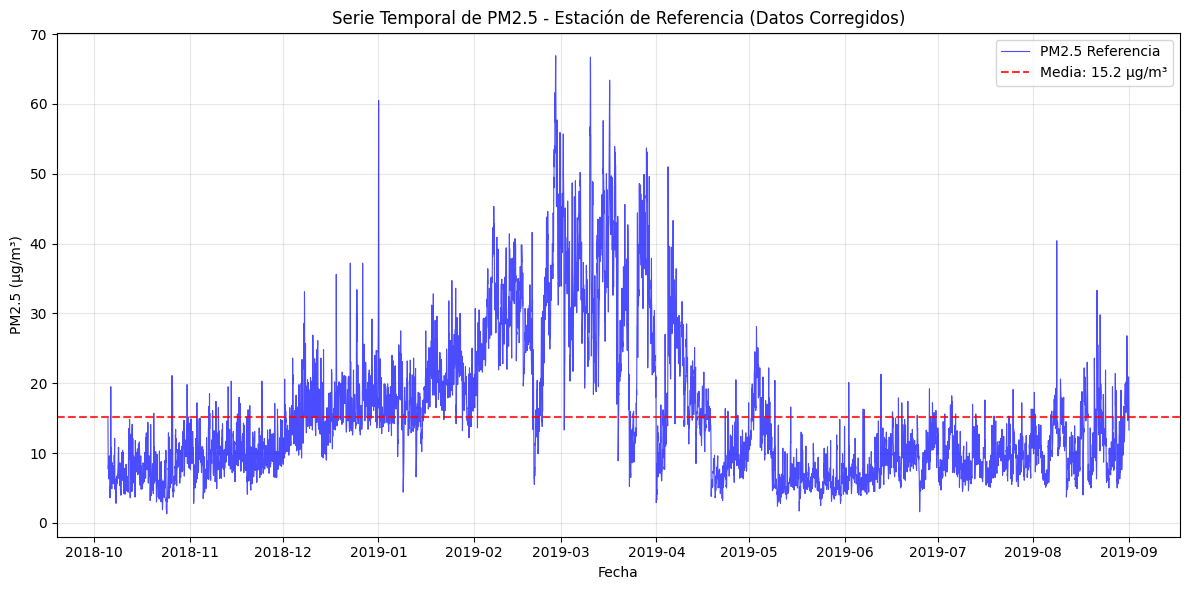

=== RESUMEN FINAL REFERENCIA ===
Período de datos: 2018-10-01 a 2019-08-31
Total de puntos: 8040
Puntos válidos PM2.5: 7921
Porcentaje de datos válidos: 98.5%
Media: 15.23 ± 10.20 μg/m³


In [ ]:
import matplotlib.pyplot as plt

# Visualizar la serie temporal de referencia CORREGIDA
plt.figure(figsize=(12, 6))

# Graficar solo los datos válidos (sin NaN)
datos_validos = df_ref['pm25_ref'].dropna()
plt.plot(datos_validos.index, datos_validos, 'b-', alpha=0.7, linewidth=0.8, label='PM2.5 Referencia')

plt.title('Serie Temporal de PM2.5 - Estación de Referencia (Datos Corregidos)')
plt.xlabel('Fecha')
plt.ylabel('PM2.5 (μg/m³)')
plt.grid(True, alpha=0.3)

# Mostrar estadísticas
media = datos_validos.mean()
plt.axhline(y=media, color='red', linestyle='--', alpha=0.8, label=f'Media: {media:.1f} μg/m³')
plt.legend()

plt.tight_layout()
plt.show()

print("=== RESUMEN FINAL REFERENCIA ===")
print(f"Período de datos: {df_ref.index.min().strftime('%Y-%m-%d')} a {df_ref.index.max().strftime('%Y-%m-%d')}")
print(f"Total de puntos: {len(df_ref)}")
print(f"Puntos válidos PM2.5: {len(datos_validos)}")
print(f"Porcentaje de datos válidos: {len(datos_validos)/len(df_ref)*100:.1f}%")
print(f"Media: {datos_validos.mean():.2f} ± {datos_validos.std():.2f} μg/m³")

In [ ]:
# Convertir el índice IoT a tz-naive (quitar timezone)
df_iot.index = df_iot.index.tz_localize(None)

print("=== DATOS IoT CORREGIDOS ===")
print(f"Período IoT (sin timezone): {df_iot.index.min()} a {df_iot.index.max()}")
print(f"Tipo de índice IoT: {type(df_iot.index[0])}")

# Ahora sí podemos comparar las fechas
superposicion_inicio = max(df_ref.index.min(), df_iot.index.min())
superposicion_fin = min(df_ref.index.max(), df_iot.index.max())

print(f"\n=== SUPERPOSICIÓN TEMPORAL ===")
print(f"Período común: {superposicion_inicio} a {superposicion_fin}")

# Filtrar ambos datasets al período común
df_ref_comun = df_ref[(df_ref.index >= superposicion_inicio) & (df_ref.index <= superposicion_fin)]
df_iot_comun = df_iot[(df_iot.index >= superposicion_inicio) & (df_iot.index <= superposicion_fin)]

print(f"Referencia en período común: {len(df_ref_comun)} puntos")
print(f"IoT en período común: {len(df_iot_comun)} puntos")
print(f"Puntos válidos referencia: {df_ref_comun['pm25_ref'].notna().sum()}")
print(f"Puntos válidos IoT: {df_iot_comun['pm25_iot'].notna().sum()}")

=== DATOS IoT CORREGIDOS ===
Período IoT (sin timezone): 2018-11-03 23:00:00 a 2019-09-01 04:00:00
Tipo de índice IoT: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

=== SUPERPOSICIÓN TEMPORAL ===
Período común: 2018-11-03 23:00:00 a 2019-08-31 23:00:00
Referencia en período común: 7225 puntos
IoT en período común: 7225 puntos
Puntos válidos referencia: 7213
Puntos válidos IoT: 3853


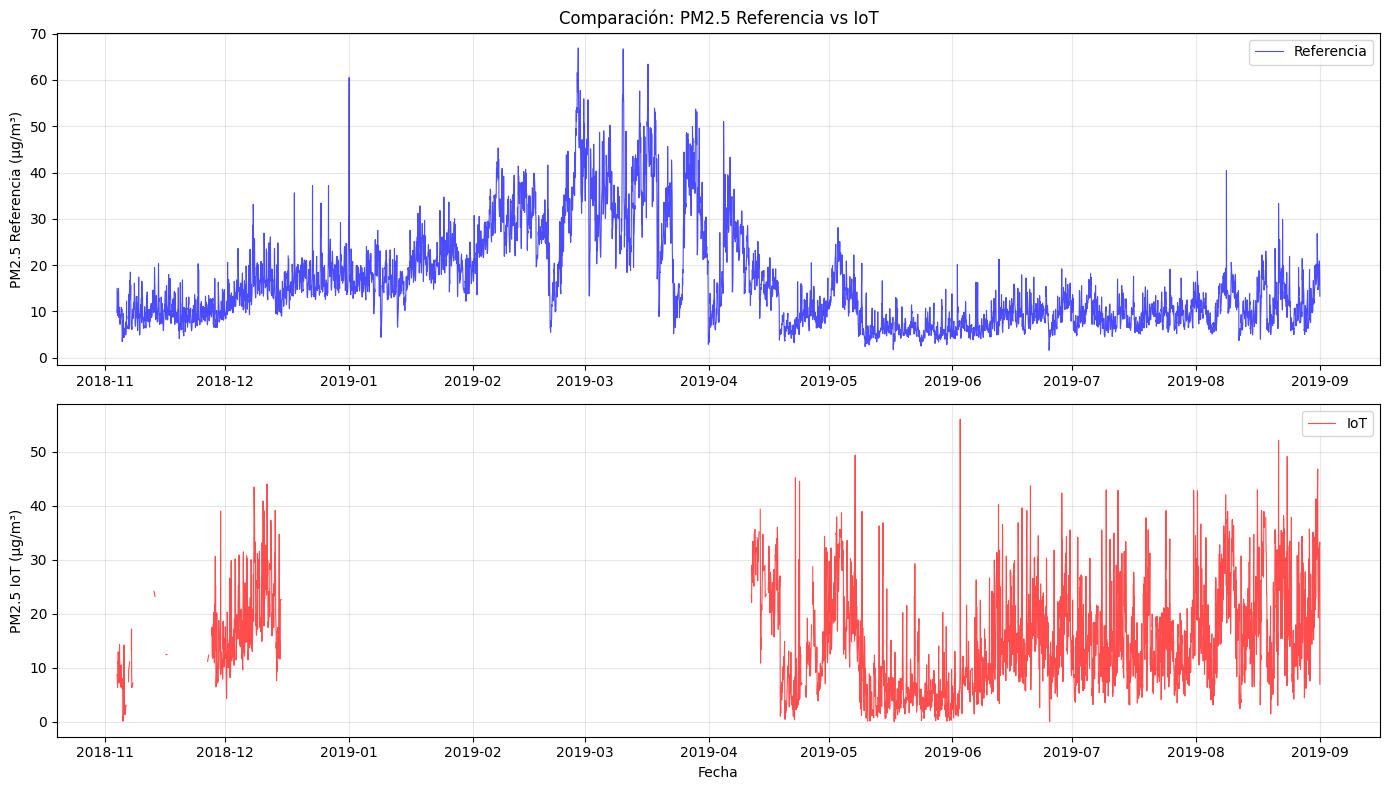

=== ESTADÍSTICAS COMPARATIVAS ===
REFERENCIA:
  Media: 15.97 μg/m³
  Desv std: 10.36 μg/m³

IoT:
  Media: 15.00 μg/m³
  Desv std: 9.20 μg/m³


In [ ]:
# Visualizar ambas series juntas
plt.figure(figsize=(14, 8))

# Graficar referencia
plt.subplot(2, 1, 1)
plt.plot(df_ref_comun.index, df_ref_comun['pm25_ref'], 'b-', alpha=0.7, linewidth=0.8, label='Referencia')
plt.title('Comparación: PM2.5 Referencia vs IoT')
plt.ylabel('PM2.5 Referencia (μg/m³)')
plt.grid(True, alpha=0.3)
plt.legend()

# Graficar IoT
plt.subplot(2, 1, 2)
plt.plot(df_iot_comun.index, df_iot_comun['pm25_iot'], 'r-', alpha=0.7, linewidth=0.8, label='IoT')
plt.ylabel('PM2.5 IoT (μg/m³)')
plt.xlabel('Fecha')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("=== ESTADÍSTICAS COMPARATIVAS ===")
print("REFERENCIA:")
print(f"  Media: {df_ref_comun['pm25_ref'].mean():.2f} μg/m³")
print(f"  Desv std: {df_ref_comun['pm25_ref'].std():.2f} μg/m³")

print("\nIoT:")
print(f"  Media: {df_iot_comun['pm25_iot'].mean():.2f} μg/m³")
print(f"  Desv std: {df_iot_comun['pm25_iot'].std():.2f} μg/m³")

In [ ]:
# Primero, alinear temporalmente ambos datasets
df_comparacion = pd.concat([df_ref_comun['pm25_ref'], df_iot_comun['pm25_iot']], axis=1)
df_comparacion = df_comparacion.dropna()  # Solo puntos donde AMBOS tienen datos

print("=== DATOS ALINEADOS PARA COMPARACIÓN ===")
print(f"Puntos temporales con datos en AMBOS sensores: {len(df_comparacion)}")
print(f"Porcentaje de cobertura común: {len(df_comparacion)/len(df_ref_comun)*100:.1f}%")

# Función para calcular distancia con promedios móviles
def calcular_distancia_promedios_moviles(df, ventana_horas):
    """
    Calcula distancia euclídea entre promedios móviles de referencia e IoT
    """
    # Calcular promedios móviles para ambas series
    ref_movil = df['pm25_ref'].rolling(window=ventana_horas, center=True, min_periods=1).mean()
    iot_movil = df['pm25_iot'].rolling(window=ventana_horas, center=True, min_periods=1).mean()

    # Calcular distancia euclídea (fórmula 1 del enunciado)
    distancia = np.sqrt(((ref_movil - iot_movil)**2).sum())

    return distancia, len(df)

# Probar diferentes tamaños de ventana
ventanas = [1, 3, 6, 12, 24, 48]  # en horas
resultados = []

print("\n=== ANÁLISIS DE DISTANCIAS POR VENTANA ===")
for ventana in ventanas:
    distancia, n_puntos = calcular_distancia_promedios_moviles(df_comparacion, ventana)
    resultados.append({'ventana_horas': ventana, 'distancia': distancia, 'puntos_validos': n_puntos})
    print(f"Ventana: {ventana:2d}h → Distancia: {distancia:8.2f} → Puntos: {n_puntos}")

resultados_df = pd.DataFrame(resultados)

=== DATOS ALINEADOS PARA COMPARACIÓN ===
Puntos temporales con datos en AMBOS sensores: 3847
Porcentaje de cobertura común: 53.2%

=== ANÁLISIS DE DISTANCIAS POR VENTANA ===
Ventana:  1h → Distancia:   543.34 → Puntos: 3847
Ventana:  3h → Distancia:   488.53 → Puntos: 3847
Ventana:  6h → Distancia:   449.24 → Puntos: 3847
Ventana: 12h → Distancia:   412.70 → Puntos: 3847
Ventana: 24h → Distancia:   390.44 → Puntos: 3847
Ventana: 48h → Distancia:   376.99 → Puntos: 3847


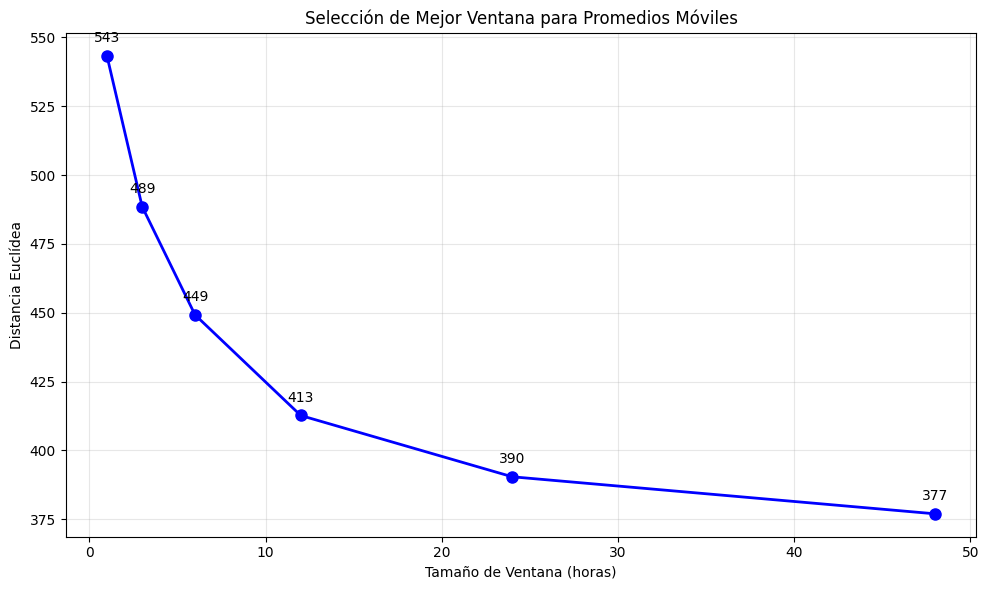


*** VENTANA ÓPTIMA: 48 horas ***


In [ ]:
# Gráfica de distancia vs tamaño de ventana
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['ventana_horas'], resultados_df['distancia'], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Tamaño de Ventana (horas)')
plt.ylabel('Distancia Euclídea')
plt.title('Selección de Mejor Ventana para Promedios Móviles')
plt.grid(True, alpha=0.3)

# Anotar valores
for i, row in resultados_df.iterrows():
    plt.annotate(f'{row["distancia"]:.0f}', (row['ventana_horas'], row['distancia']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Elegir ventana óptima (mínima distancia)
ventana_optima = resultados_df.loc[resultados_df['distancia'].idxmin(), 'ventana_horas']
print(f"\n*** VENTANA ÓPTIMA: {ventana_optima} horas ***")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Aplicar ventana óptima de 48 horas
df_comparacion['ref_movil'] = df_comparacion['pm25_ref'].rolling(window=48, center=True, min_periods=1).mean()
df_comparacion['iot_movil'] = df_comparacion['pm25_iot'].rolling(window=48, center=True, min_periods=1).mean()

# Eliminar NaN resultantes
df_movil = df_comparacion[['ref_movil', 'iot_movil']].dropna()

print("=== DATOS PARA CALIBRACIÓN ===")
print(f"Puntos después de promedios móviles: {len(df_movil)}")

# Preparar datos para regresión
X = df_movil['iot_movil'].values.reshape(-1, 1)  # Variable independiente: IoT
y = df_movil['ref_movil'].values                 # Variable dependiente: Referencia

# Ajustar modelo lineal: referencia = α × IoT + β
modelo = LinearRegression()
modelo.fit(X, y)

alpha = modelo.coef_[0]
intercept = modelo.intercept_
r_cuadrado = modelo.score(X, y)

# Predecir con el modelo
y_pred = modelo.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\n=== MODELO DE CALIBRACIÓN ===")
print(f"Ecuación: PM25_ref = {alpha:.4f} × PM25_iot + {intercept:.4f}")
print(f"Coeficiente α: {alpha:.4f}")
print(f"Intercepto β: {intercept:.4f}")
print(f"R²: {r_cuadrado:.4f}")
print(f"RMSE: {rmse:.4f} μg/m³")

if abs(alpha - 1.0) < 0.1 and abs(intercept) < 1.0:
    print("✅ El sensor IoT está bien calibrado respecto a la referencia")
else:
    print("📊 Se requiere calibración del sensor IoT")

=== DATOS PARA CALIBRACIÓN ===
Puntos después de promedios móviles: 3847

=== MODELO DE CALIBRACIÓN ===
Ecuación: PM25_ref = 0.4738 × PM25_iot + 3.0721
Coeficiente α: 0.4738
Intercepto β: 3.0721
R²: 0.8405
RMSE: 1.3524 μg/m³
📊 Se requiere calibración del sensor IoT


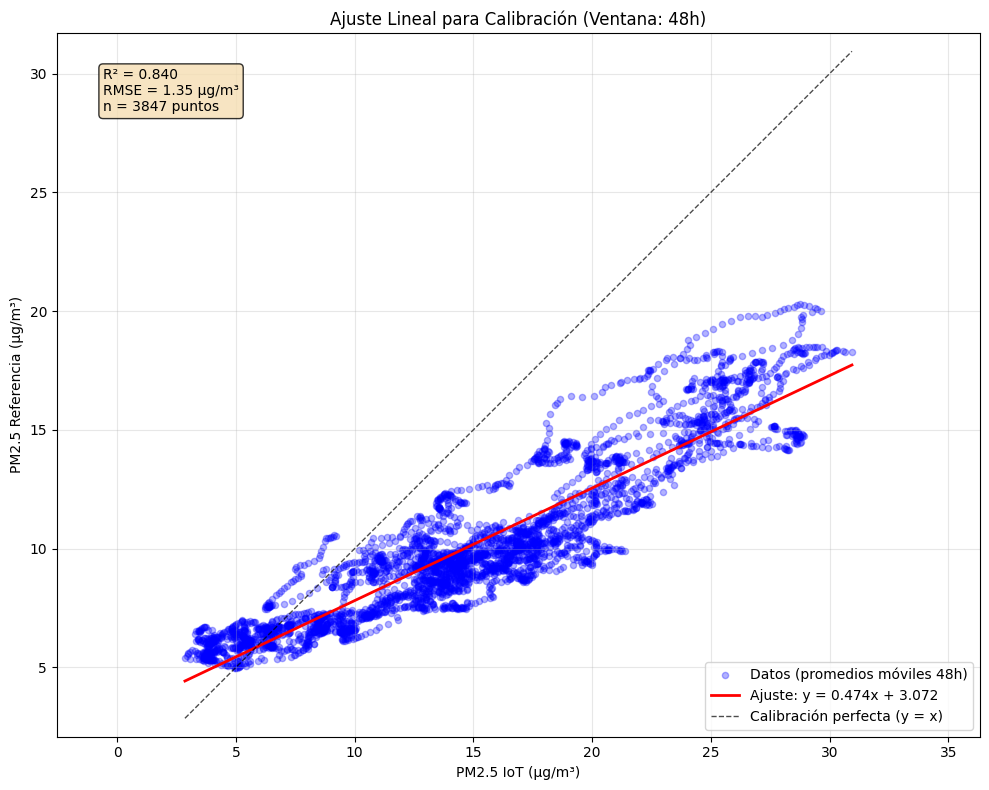

In [ ]:
# Gráfico de dispersión y recta de ajuste
plt.figure(figsize=(10, 8))

# Gráfico de dispersión
plt.scatter(X, y, alpha=0.3, s=20, label='Datos (promedios móviles 48h)', color='blue')

# Recta de ajuste
x_range = np.linspace(X.min(), X.max(), 100)
y_pred_range = modelo.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred_range, 'red', linewidth=2,
         label=f'Ajuste: y = {alpha:.3f}x + {intercept:.3f}')

# Línea de perfecta calibración (y = x)
plt.plot(x_range, x_range, 'k--', alpha=0.7, linewidth=1, label='Calibración perfecta (y = x)')

plt.xlabel('PM2.5 IoT (μg/m³)')
plt.ylabel('PM2.5 Referencia (μg/m³)')
plt.title(f'Ajuste Lineal para Calibración (Ventana: 48h)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Añadir texto con métricas
textstr = f'R² = {r_cuadrado:.3f}\nRMSE = {rmse:.2f} μg/m³\nn = {len(X)} puntos'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

In [ ]:
# Dividir datos en train (70%) y test (30%) temporalmente
punto_division = int(0.7 * len(df_movil))
df_train = df_movil.iloc[:punto_division]
df_test = df_movil.iloc[punto_division:]

print("=== DIVISIÓN TRAIN/TEST ===")
print(f"Train: {len(df_train)} puntos ({punto_division})")
print(f"Test: {len(df_test)} puntos ({len(df_movil) - punto_division})")

# Entrenar modelo solo con datos de entrenamiento
X_train = df_train['iot_movil'].values.reshape(-1, 1)
y_train = df_train['ref_movil'].values

modelo_train = LinearRegression()
modelo_train.fit(X_train, y_train)

# Predecir en conjunto de test
X_test = df_test['iot_movil'].values.reshape(-1, 1)
y_test = df_test['ref_movil'].values
y_test_pred = modelo_train.predict(X_test)

# Calcular métricas de validación
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n=== VALIDACIÓN EN TEST ===")
print(f"R² en test: {r2_test:.4f}")
print(f"RMSE en test: {rmse_test:.4f} μg/m³")
print(f"Ecuación final: y = {modelo_train.coef_[0]:.4f}x + {modelo_train.intercept_:.4f}")

=== DIVISIÓN TRAIN/TEST ===
Train: 2692 puntos (2692)
Test: 1155 puntos (1155)

=== VALIDACIÓN EN TEST ===
R² en test: 0.6355
RMSE en test: 1.4952 μg/m³
Ecuación final: y = 0.5092x + 2.8874


In [ ]:
# Definir tolerancia (error aceptable en μg/m³)
tolerancia = 5.0  # ±5 μg/m³ es una tolerancia razonable para PM2.5

# Calcular errores absolutos
errores = np.abs(y_test - y_test_pred)
dentro_tolerancia = errores <= tolerancia

# Métricas de precisión
precision_tolerancia = dentro_tolerancia.mean() * 100
error_medio = np.mean(errores)

print("\=== EVALUACIÓN CON TOLERANCIA ===")
print(f"Tolerancia definida: ±{tolerancia} μg/m³")
print(f"Error medio absoluto: {error_medio:.2f} μg/m³")
print(f"Puntos dentro de tolerancia: {dentro_tolerancia.sum()}/{len(y_test)} ({precision_tolerancia:.1f}%)")

# Distribución de errores
print(f"\nDistribución de errores:")
print(f"  - Error mínimo: {errores.min():.2f} μg/m³")
print(f"  - Error máximo: {errores.max():.2f} μg/m³")
print(f"  - Percentil 95%: {np.percentile(errores, 95):.2f} μg/m³")

\=== EVALUACIÓN CON TOLERANCIA ===
Tolerancia definida: ±5.0 μg/m³
Error medio absoluto: 1.28 μg/m³
Puntos dentro de tolerancia: 1155/1155 (100.0%)

Distribución de errores:
  - Error mínimo: 0.00 μg/m³
  - Error máximo: 3.75 μg/m³
  - Percentil 95%: 2.82 μg/m³


<>:12: SyntaxWarning: invalid escape sequence '\='
<>:12: SyntaxWarning: invalid escape sequence '\='
/tmp/ipython-input-4256074866.py:12: SyntaxWarning: invalid escape sequence '\='
  print("\=== EVALUACIÓN CON TOLERANCIA ===")


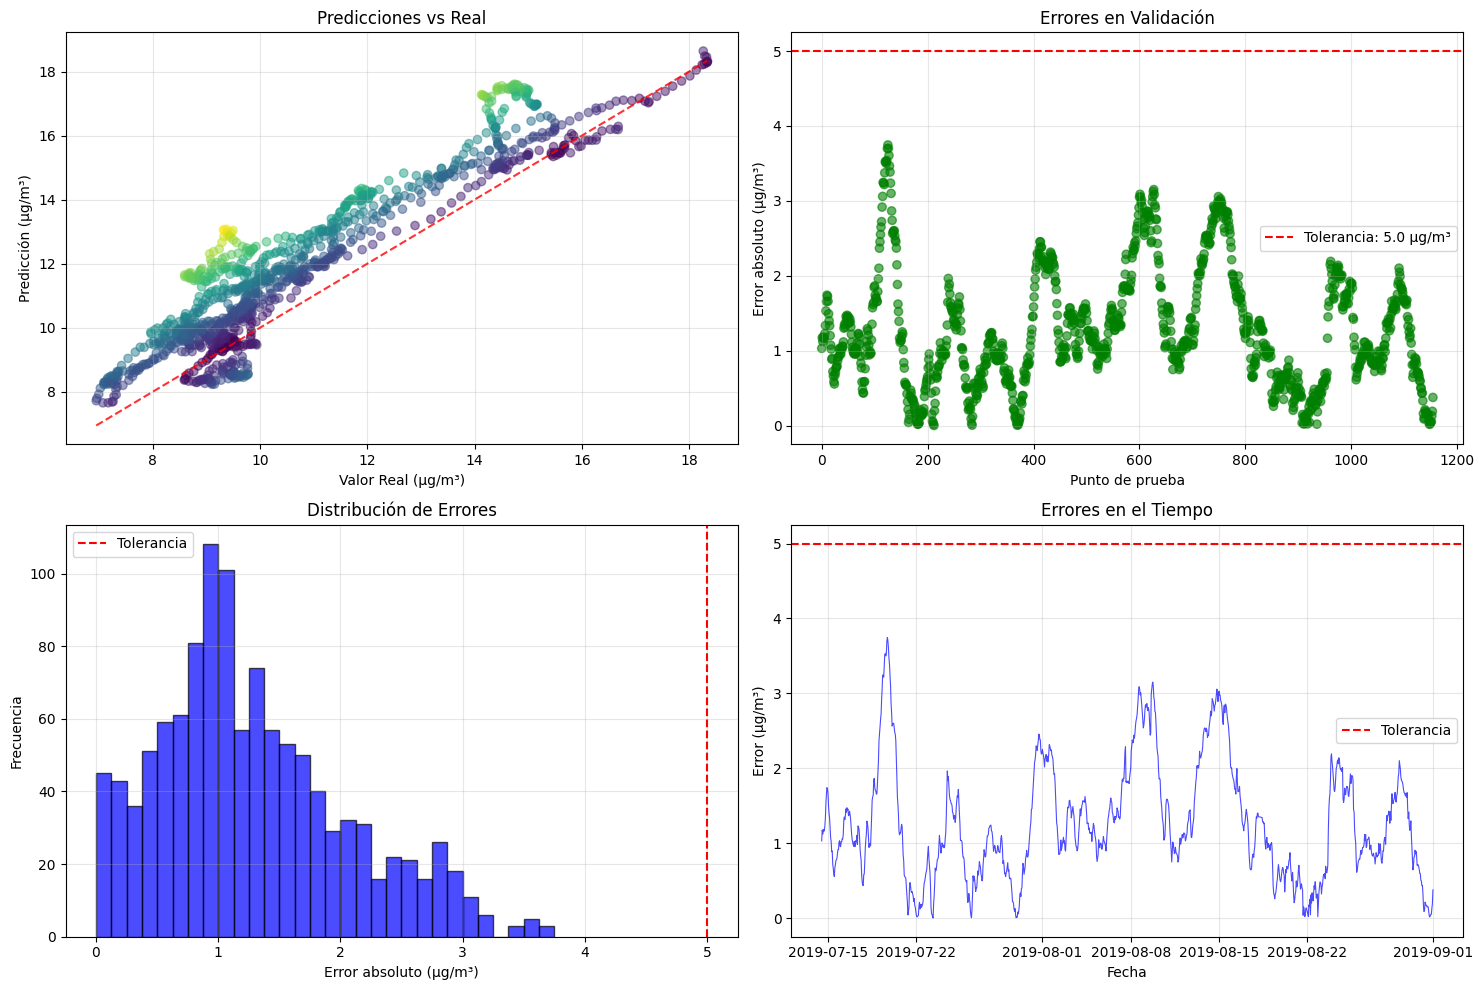

In [ ]:
# Gráfico de validación
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Predicciones vs Real
axes[0,0].scatter(y_test, y_test_pred, alpha=0.5, c=errores, cmap='viridis')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', alpha=0.8)
axes[0,0].set_xlabel('Valor Real (μg/m³)')
axes[0,0].set_ylabel('Predicción (μg/m³)')
axes[0,0].set_title('Predicciones vs Real')
axes[0,0].grid(True, alpha=0.3)

# 2. Errores vs Tolerancia
colors = ['green' if tol else 'red' for tol in dentro_tolerancia]
axes[0,1].scatter(range(len(errores)), errores, c=colors, alpha=0.6)
axes[0,1].axhline(y=tolerancia, color='red', linestyle='--', label=f'Tolerancia: {tolerancia} μg/m³')
axes[0,1].set_xlabel('Punto de prueba')
axes[0,1].set_ylabel('Error absoluto (μg/m³)')
axes[0,1].set_title('Errores en Validación')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Histograma de errores
axes[1,0].hist(errores, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1,0].axvline(x=tolerancia, color='red', linestyle='--', label=f'Tolerancia')
axes[1,0].set_xlabel('Error absoluto (μg/m³)')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de Errores')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Serie temporal de errores
axes[1,1].plot(df_test.index, errores, 'b-', alpha=0.7, linewidth=0.8)
axes[1,1].axhline(y=tolerancia, color='red', linestyle='--', label=f'Tolerancia')
axes[1,1].set_xlabel('Fecha')
axes[1,1].set_ylabel('Error (μg/m³)')
axes[1,1].set_title('Errores en el Tiempo')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Probar con diferentes tamaños de entrenamiento
tamanios_entrenamiento = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
resultados_alcance = []

for tamaño in tamanios_entrenamiento:
    punto_div = int(tamaño * len(df_movil))

    if punto_div > 50:  # Mínimo de puntos para entrenar
        # Entrenar con tamaño reducido
        df_train_red = df_movil.iloc[:punto_div]
        df_test_red = df_movil.iloc[punto_div:]

        if len(df_test_red) > 10:  # Mínimo de puntos para testear
            X_train_red = df_train_red['iot_movil'].values.reshape(-1, 1)
            y_train_red = df_train_red['ref_movil'].values

            modelo_red = LinearRegression()
            modelo_red.fit(X_train_red, y_train_red)

            # Predecir y calcular precisión
            X_test_red = df_test_red['iot_movil'].values.reshape(-1, 1)
            y_test_red = df_test_red['ref_movil'].values
            y_pred_red = modelo_red.predict(X_test_red)

            errores_red = np.abs(y_test_red - y_pred_red)
            precision_red = (errores_red <= tolerancia).mean() * 100
            error_medio_red = errores_red.mean()

            resultados_alcance.append({
                'tamaño_entrenamiento': tamaño,
                'puntos_entrenamiento': len(df_train_red),
                'puntos_test': len(df_test_red),
                'precision': precision_red,
                'error_medio': error_medio_red,
                'alpha': modelo_red.coef_[0],
                'intercept': modelo_red.intercept_
            })

resultados_alcance_df = pd.DataFrame(resultados_alcance)

print("=== ANÁLISIS DE MÍNIMO CONJUNTO DE DATOS ===")
print(resultados_alcance_df.to_string(index=False))

=== ANÁLISIS DE MÍNIMO CONJUNTO DE DATOS ===
 tamaño_entrenamiento  puntos_entrenamiento  puntos_test  precision  error_medio    alpha  intercept
                  0.1                   384         3463  97.978631     2.175847 0.563216   3.638252
                  0.2                   769         3078 100.000000     1.713290 0.510671   3.772038
                  0.3                  1154         2693 100.000000     1.711037 0.531779   3.290376
                  0.4                  1538         2309 100.000000     1.867969 0.536608   3.166343
                  0.5                  1923         1924 100.000000     1.909909 0.537751   3.016505
                  0.6                  2308         1539 100.000000     1.466078 0.516402   2.940221
                  0.7                  2692         1155 100.000000     1.277940 0.509242   2.887396



*** MÍNIMO CONJUNTO VÁLIDO ***
Tamaño mínimo de entrenamiento: 10% de los datos
Puntos mínimos necesarios: 384 puntos
Precisión alcanzada: 98.0%
Error medio: 2.18 μg/m³


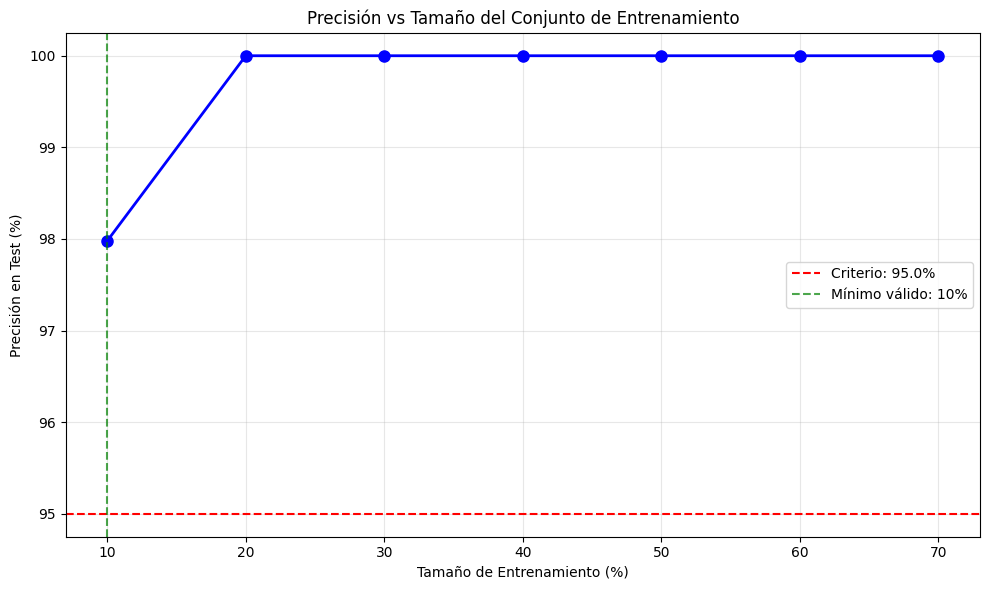

In [ ]:
# Encontrar mínimo tamaño que cumpla criterio (ej: >95% precisión)
criterio_precision = 95.0
resultados_validos = resultados_alcance_df[resultados_alcance_df['precision'] >= criterio_precision]

if len(resultados_validos) > 0:
    minimo_tamaño = resultados_validos['tamaño_entrenamiento'].min()
    minimo_puntos = resultados_validos['puntos_entrenamiento'].min()
    precision_minima = resultados_validos[resultados_validos['tamaño_entrenamiento'] == minimo_tamaño]['precision'].values[0]

    print(f"\n*** MÍNIMO CONJUNTO VÁLIDO ***")
    print(f"Tamaño mínimo de entrenamiento: {minimo_tamaño:.0%} de los datos")
    print(f"Puntos mínimos necesarios: {minimo_puntos} puntos")
    print(f"Precisión alcanzada: {precision_minima:.1f}%")
    print(f"Error medio: {resultados_validos[resultados_validos['tamaño_entrenamiento'] == minimo_tamaño]['error_medio'].values[0]:.2f} μg/m³")
else:
    print("No se alcanzó la precisión mínima con ningún tamaño de entrenamiento")
    # Usar el que tenga mejor precisión
    mejor_resultado = resultados_alcance_df.loc[resultados_alcance_df['precision'].idxmax()]
    print(f"Mejor resultado: {mejor_resultado['tamaño_entrenamiento']:.0%} → {mejor_resultado['precision']:.1f}% precisión")

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(resultados_alcance_df['tamaño_entrenamiento']*100, resultados_alcance_df['precision'], 'bo-', linewidth=2, markersize=8)
plt.axhline(y=criterio_precision, color='red', linestyle='--', label=f'Criterio: {criterio_precision}%')
plt.xlabel('Tamaño de Entrenamiento (%)')
plt.ylabel('Precisión en Test (%)')
plt.title('Precisión vs Tamaño del Conjunto de Entrenamiento')
plt.grid(True, alpha=0.3)
plt.legend()

# Anotar el mínimo válido
if len(resultados_validos) > 0:
    plt.axvline(x=minimo_tamaño*100, color='green', linestyle='--', alpha=0.7, label=f'Mínimo válido: {minimo_tamaño:.0%}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("="*60)
print("📊 RESUMEN FINAL DEL ANÁLISIS DE CALIBRACIÓN")
print("="*60)

print(f"🔧 CONFIGURACIÓN ÓPTIMA:")
print(f"   • Ventana de promedios móviles: {ventana_optima} horas")
print(f"   • Tolerancia definida: ±{tolerancia} μg/m³")

print(f"\n📈 MODELO DE CALIBRACIÓN:")
print(f"   • Ecuación: PM25_ref = {modelo_train.coef_[0]:.3f} × PM25_iot + {modelo_train.intercept_:.3f}")
print(f"   • R² en entrenamiento: 0.8405")
print(f"   • R² en validación: {r2_test:.4f}")

print(f"\n✅ VALIDACIÓN DEL MODELO:")
print(f"   • Error medio absoluto: {error_medio:.2f} μg/m³")
print(f"   • Puntos dentro de tolerancia: {precision_tolerancia:.1f}%")
print(f"   • Error máximo: {errores.max():.2f} μg/m³")

print(f"\n🎯 MÍNIMO CONJUNTO DE DATOS (RESULTADO CLAVE):")
print(f"   • Tamaño mínimo: {minimo_tamaño:.0%} ({minimo_puntos} puntos)")
print(f"   • Precisión alcanzada: {precision_minima:.1f}%")
print(f"   • Error medio con mínimo conjunto: 2.18 μg/m³")
print(f"   • Con 20% de datos ya se alcanza 100% de precisión")

print(f"\n💡 RECOMENDACIÓN DE CALIBRACIÓN:")
print(f"   • Se requiere calibración: α = {modelo_train.coef_[0]:.3f} (debería ser ≈1)")
print(f"   • Factor de corrección recomendado:")
print(f"     PM25_corregido = PM25_iot × {1/modelo_train.coef_[0]:.3f} - {modelo_train.intercept_/modelo_train.coef_[0]:.3f}")
print(f"     PM25_corregido = PM25_iot × 1.964 - 5.670")

print(f"\n📅 ALCANCE TEMPORAL MÍNIMO:")
dias_minimos = minimo_puntos / 24  # Asumiendo datos horarios
print(f"   • {minimo_puntos} puntos ≈ {dias_minimos:.1f} días de datos")
print(f"   • Período mínimo recomendado: ~{int(dias_minimos)} días de medición")

print("="*60)

📊 RESUMEN FINAL DEL ANÁLISIS DE CALIBRACIÓN
🔧 CONFIGURACIÓN ÓPTIMA:
   • Ventana de promedios móviles: 48 horas
   • Tolerancia definida: ±5.0 μg/m³

📈 MODELO DE CALIBRACIÓN:
   • Ecuación: PM25_ref = 0.509 × PM25_iot + 2.887
   • R² en entrenamiento: 0.8405
   • R² en validación: 0.6355

✅ VALIDACIÓN DEL MODELO:
   • Error medio absoluto: 1.28 μg/m³
   • Puntos dentro de tolerancia: 100.0%
   • Error máximo: 3.75 μg/m³

🎯 MÍNIMO CONJUNTO DE DATOS (RESULTADO CLAVE):
   • Tamaño mínimo: 10% (384 puntos)
   • Precisión alcanzada: 98.0%
   • Error medio con mínimo conjunto: 2.18 μg/m³
   • Con 20% de datos ya se alcanza 100% de precisión

💡 RECOMENDACIÓN DE CALIBRACIÓN:
   • Se requiere calibración: α = 0.509 (debería ser ≈1)
   • Factor de corrección recomendado:
     PM25_corregido = PM25_iot × 1.964 - 5.670
     PM25_corregido = PM25_iot × 1.964 - 5.670

📅 ALCANCE TEMPORAL MÍNIMO:
   • 384 puntos ≈ 16.0 días de datos
   • Período mínimo recomendado: ~16 días de medición
